In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


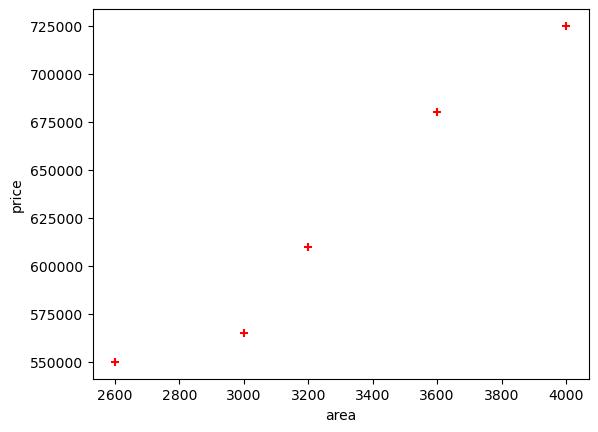

In [14]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')


In [25]:
# reg = linear_model.LinearRegression()
# reg.fit(df[['area']],df.price)##training my model with fit method[independent],target====df......

LinearRegression()

In [18]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [20]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [22]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)##training my model with fit method

LinearRegression()

In [24]:
reg.predict([[3300]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [28]:
reg.coef_## m

array([135.78767123])

In [30]:
reg.intercept_## c

180616.43835616432

In [29]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

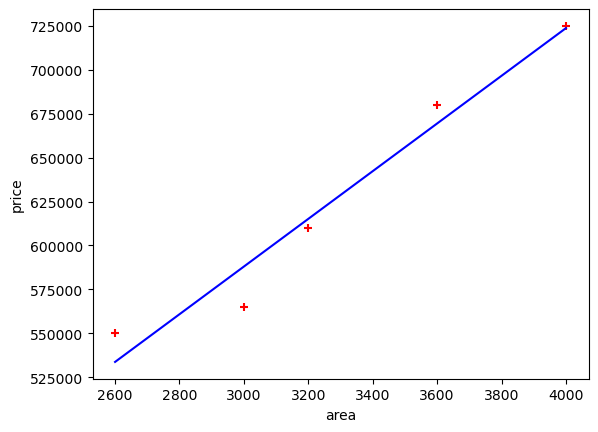

In [48]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(new_df),color='blue')
#plt.plot(df.area,reg.predict[['area']],color='blue')

In [42]:
d = pd.read_csv("areas.csv")
# d.head(3)
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [44]:
p = reg.predict(d)
p


array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [46]:
d['prices']=p #creatiing new column in the original database
d


,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [50]:
d.to_csv("prediction.csv")#add index to false if dont want to export

# for Multiclass csv predict

In [66]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [67]:
df = pd.read_csv('home.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [68]:
df.bedrooms.median()##avg

4.0

In [69]:
##  for integer
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [70]:
df.bedrooms.fillna(df.bedrooms.median())##to fill the null with medians

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [71]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [72]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [73]:

reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [74]:
reg.predict([[3000, 3, 40]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [75]:
reg.predict([[2500, 4, 5]])


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

# Gradient Descent


In [ ]:
#x and y onk value dew ase oikane teke m and b value find for min cost/value ei type

In [69]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.06

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 3.7199999999999998, b 1.08, cost 89.0 iteration 0
m 2.1408000000000005, b 0.6912, cost 16.414399999999997 iteration 1
m 2.7861119999999997, b 0.9175679999999998, cost 3.598154239999994 iteration 2
m 2.4981196800000003, b 0.8844595199999999, cost 1.3120671703039974 iteration 3
m 2.6021962752, b 0.9590012927999998, cost 0.8821128126070779 iteration 4
m 2.542056726528, b 0.9871304785919999, cost 0.7802287003212346 iteration 5
m 2.55117487521792, b 1.03353439961088, cost 0.7371873705156168 iteration 6
m 2.531551656070349, b 1.071087316579123, cost 0.7055195398112968 iteration 7
m 2.5243120360890043, b 1.1111982424043028, cost 0.6768225463195567 iteration 8
m 2.5121887811859698, b 1.1491021203237448, cost 0.649577330801426 iteration 9
m 2.5024228267039414, b 1.1868219046579462, cost 0.6234790097440573 iteration 10
m 2.491968809777878, b 1.2235310584855736, cost 0.5984380862766648 iteration 11
m 2.4820987998162725, b 1.2595985599472688, cost 0.5744044433169527 iteration 12
m 2.472272902477

# for a csv file


In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 10
    n = len(x)
    learning_rate = 0.04

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

if __name__ == "__main__":
    df = pd.read_csv("test_scores.csv")
    x = np.array(df.math)
    y = np.array(df.cs)

    m, b = gradient_descent(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

    m_sklearn, b_sklearn = predict_using_sklean()
    print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

m 395.672, b 5.5920000000000005, cost 5199.1, iteration 0
m -149087.439488, b -2103.7345279999995, cost 737523817.1072063, iteration 1
m 56324945.672725, b 794793.432858112, cost 105266305703150.33, iteration 2
m -21279305459.934875, b -300269294.12481296, cost 1.5024593561977504e+19, iteration 3
m 8039223897830.077, b 113440360632.88918, cost 2.1444507831334306e+24, iteration 4
m -3037181875975203.0, b -42857247378216.08, cost 3.0607611063232796e+29, iteration 5
m 1.1474333673233434e+18, b 1.619127127762353e+16, cost 4.368605063666969e+34, iteration 6
m -4.3349505765908093e+20, b -6.116987945400535e+18, cost 6.235282512859056e+39, iteration 7
m 1.6377244236256832e+23, b 2.3109699592203602e+21, cost 8.899579487858646e+44, iteration 8
m -6.187247675265139e+25, b -8.730738396230824e+23, cost 1.2702313792097564e+50, iteration 9
Using gradient descent function: Coef -6.187247675265139e+25 Intercept -8.730738396230824e+23
Using sklearn: Coef [1.01773624] Intercept 1.9152193111569176


# Dummies Variable

In [76]:
import pandas as pd

In [78]:
df = pd.read_csv("skl.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [80]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [82]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [84]:
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


In [86]:
#Dummy Variable Trap

In [88]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [90]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [98]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [94]:
model.predict([[3600,False,True]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([692293.59277574])

In [100]:
model.score(X,y)#calculate the accuracy of the model in %

0.9573929037221871

In [102]:
model.predict(X)# x er jonno ki ki predict korse of y/price value here

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [104]:
#Using sklearn OneHotEncoder

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [110]:
dfle = df
le.fit_transform(dfle.town)
##assigning lable to town serially in original

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [112]:
###ar korii nai

***Exercise Practice***

In [3]:
import pandas as pd
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [21]:
dummies = pd.get_dummies(df['Car Model'])
dummies



,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [23]:
merged = pd.concat([df,dummies],axis='columns')
merged
final = merged.drop(['Car Model'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,False,True,False
1,35000,34000,3,False,True,False
2,57000,26100,5,False,True,False
3,22500,40000,2,False,True,False
4,46000,31500,4,False,True,False
5,59000,29400,5,True,False,False
6,52000,32000,5,True,False,False
7,72000,19300,6,True,False,False
8,91000,12000,8,True,False,False
9,67000,22000,6,False,False,True


In [25]:
final = final.drop(['Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [33]:
X = final.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


In [35]:

y = final['Sell Price($)']
y



0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [39]:
model.score(X,y)

0.9417050937281082

In [41]:
model.predict([[45000,4,False,False]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [45]:
model.predict([[86000,7,False,True]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])